In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.duplicated().sum()

0

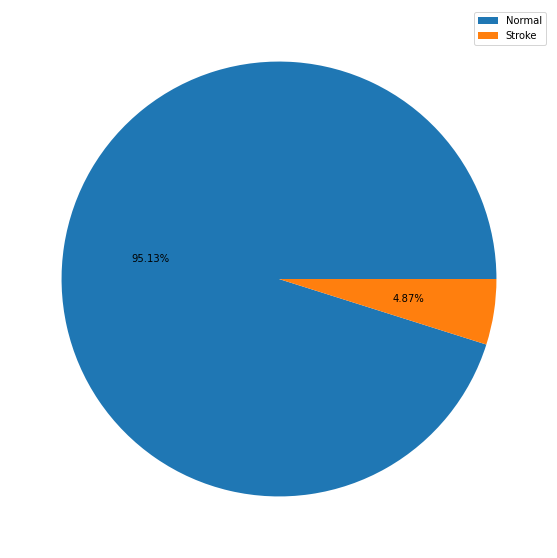

In [8]:
stroke = df['stroke']
y = stroke.astype(float).values

plt.figure(figsize=(20,10))
plt.pie(pd.DataFrame(y).value_counts(), autopct='%1.2f%%')
plt.legend(['Normal', 'Stroke'])
plt.show()

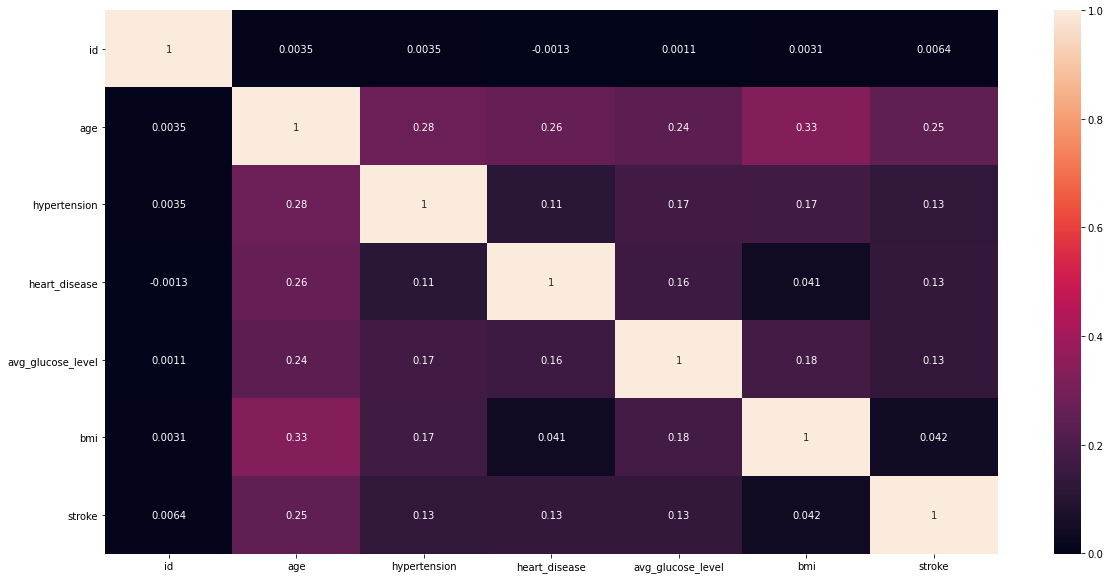

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [11]:
parameters = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level']
result = "stroke"

In [12]:
def binarize_gender(val):
    if val == 'Male':
        return 1
    else:
        return 0 

def binarize_married(val):
    if val == 'Yes':
        return 1
    else:
        return 0
    
# def binarize_gender(val):
#     if val == 'Male':
#         return 1
#     else:
#         return 0

In [13]:
df['work_type'] = df['work_type'].map(df['work_type'].value_counts())
df['Residence_type'] = df['Residence_type'].map(df['Residence_type'].value_counts())
df['smoking_status'] = df['smoking_status'].map(df['smoking_status'].value_counts())

In [14]:
df['gender'] = df['gender'].apply(binarize_gender)
df['ever_married'] = df['ever_married'].apply(binarize_married)

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3423, 11) (1687, 11) (3423,) (1687,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred))

Accuracy  0.947836395969176
Precision  0.5369672419866149
Recall  0.5086807278742763
Confusion matrix  [[1597   15]
 [  73    2]]


# Filtering Method

Sebelum feature selection  (5110, 11)
Setelah feature selection  (5110, 5)
Score of features  [2.08459428e-01 4.24625013e-01 3.26916568e+02 8.49535422e+01
 9.46984060e+01 6.06672297e+01 1.20739623e+00 1.22084166e+00
 9.05038696e+01 7.75977565e+00 9.57361544e+00]
Score of features  [6.47996990e-01 5.14667545e-01 7.03077751e-71 4.36755677e-20
 3.45192737e-22 8.12865895e-15 2.71900193e-01 2.69247580e-01
 2.76781052e-21 5.36195713e-03 1.98460643e-03]


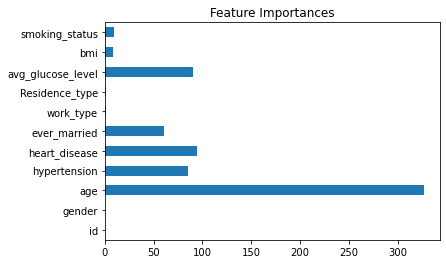

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

df_X = df.drop(['stroke'],axis=1)
df_y = df['stroke']

filter = SelectKBest(f_classif, k=5)
X_new = filter.fit_transform(df_X, df_y)

print('Sebelum feature selection ', df_X.shape)
print('Setelah feature selection ', X_new.shape)
print('Score of features ', filter.scores_)
print('Score of features ', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Accuracy  0.9093281148075668
Precision  0.5388727163220237
Recall  0.5301324348719225
Confusion matrix  [[1385   59]
 [  80    9]]


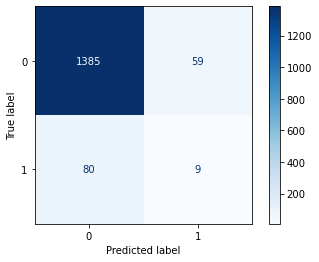

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Embedded Method

Sebelum feature selection  (5110, 11)
Setelah feature selection  (5110, 4)
Score of features  [0.17884038 0.03555938 0.2087784  0.02294293 0.02202691 0.01820412
 0.04758816 0.03605355 0.18985968 0.16846715 0.07167934]
0.09090909090909091


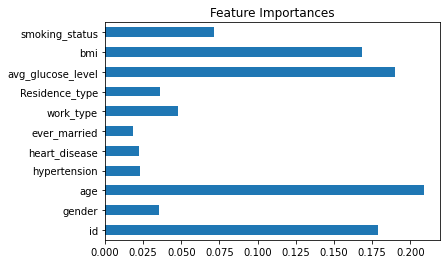

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

df_X = df.drop(['stroke'],axis=1)
df_y = df['stroke']

clf = ExtraTreesClassifier()
clf = clf.fit(df_X, df_y)
embed = SelectFromModel(clf, prefit=True)
X_new = embed.transform(df_X)

print('Sebelum feature selection ', df_X.shape)
print('Setelah feature selection ', X_new.shape)
print('Score of features ', clf.feature_importances_)
print(np.mean(clf.feature_importances_))
feat_importances = pd.Series(clf.feature_importances_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Accuracy  0.9047619047619048
Precision  0.556455151121222
Recall  0.5540671978586323
Confusion matrix  [[1373   71]
 [  75   14]]


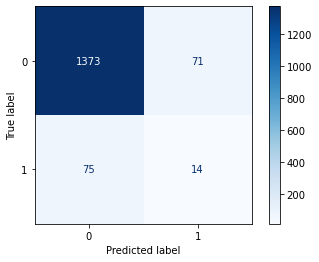

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()